<a href="https://colab.research.google.com/github/Mutlaq-Alqahtani/WalmartMLForecast/blob/main/Copy_of_Linear_Regression_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import seaborn as sns

In [2]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 63.0MB/s]


In [3]:
data_df = pd.read_csv('Walmart.csv')

In [4]:
data_df.nunique().sort_values()


,0
Holiday_Flag,2
Store,45
Date,143
Unemployment,349
Fuel_Price,892
CPI,2145
Temperature,3528
Weekly_Sales,6435


In [5]:
# This function is used to display the first few rows of the DataFrame

data_df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
#In these two functions I want to check if there is any missing values so I can handle them.
data_df.isnull().sum()


,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# Ensure the 'Date' column exists in data_df
if 'Date' in data_df.columns:
    # Convert the 'Date' column to datetime format
    data_df['Date'] = pd.to_datetime(data_df['Date'], format="%d-%m-%Y")

    # Extract 'weekday', 'month', and 'year' from the 'Date' column
    data_df['weekday'] = data_df['Date'].dt.weekday
    data_df['month'] = data_df['Date'].dt.month
    data_df['year'] = data_df['Date'].dt.year

    # Drop the 'Date' column as it is no longer needed
    data_df.drop(['Date'], axis=1, inplace=True)
else:
    print("The 'Date' column is not present in data_df.")

In [9]:
''' - .info() function Provides a summary of the DataFrame, including the number of entries, column names, non-null counts, data types, and memory usage.

    - .describe() generates descriptive statistics for the numerical columns in the DataFrame, such as count, mean, standard deviation, min, max, and percentiles '''


data_df.info()
data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.4 KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [10]:
# See the correlation between the data with the target value 'Weekly_Sales'

data_df.corr()['Weekly_Sales']


,Weekly_Sales
Store,-0.335332
Weekly_Sales,1.000000
Holiday_Flag,0.036891
Temperature,-0.063810
Fuel_Price,0.009464
CPI,-0.072634
Unemployment,-0.106176
weekday,NaN
month,0.076143
year,-0.018378


In [11]:
#Separate the target variable (Weekly_Sales) from the input features

data_y = data_df['Weekly_Sales'] # target

# Create a new DataFrame 'data_x' containing all input features by dropping the target variable.

data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [12]:
#Check whether the target (Weekly_Sales) has dropped or not.

data_x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,0,46.50,2.625,211.350143,8.106,4,3,2010


In [13]:
#Check (Weekly_Sales) has been assinged correctly or not

data_y.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [14]:
# Generate descriptive statistics for the input features

desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [15]:
'''
Normalize selected input features and convert them to a NumPy array
Normalization: Each selected feature (column) is normalized to the [0, 1] range using min-max normalization.
Conversion: The result is then converted into a NumPy array for further processing or model training.
'''

x = data_x[["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"]].apply(lambda x: (x-x.min())/(x.max()-x.min())).to_numpy()

In [16]:
# Convert the target variable 'data_y' to a NumPy array

y=data_y.to_numpy()

# Compute the maximum and minimum values of the target variable
y_max = np.max(y)
y_min = np.min(y)

# Normalize the target variable to the range [0, 1]
y = (y-y_min)/(y_max-y_min)

In [17]:
# A descriptve report for the DataFrame rows

data_x.iloc[:140].describe()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.000000
mean,1.0,0.071429,68.341071,3.212257,215.837888,7.632650,4.0,6.371429,2010.942857
std,0.0,0.258464,14.396135,0.428763,4.257347,0.355971,0.0,3.241686,0.793602
min,1.0,0.000000,35.400000,2.514000,210.337426,6.573000,4.0,1.000000,2010.000000
25%,1.0,0.000000,57.682500,2.753000,211.529051,7.348000,4.0,4.000000,2010.000000
50%,1.0,0.000000,69.865000,3.287000,215.391694,7.787000,4.0,6.000000,2011.000000
75%,1.0,0.000000,80.540000,3.579750,220.195306,7.845000,4.0,9.000000,2012.000000
max,1.0,1.000000,91.650000,3.907000,223.181477,8.106000,4.0,12.000000,2012.000000


In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients of the features used in the model.
model.coef_

array([-1.51145940e+04,  4.47537494e+04, -1.58468769e+03,  3.68204220e+04,
       -2.13732955e+03, -2.36907677e+04,  1.30967237e-10,  1.45721132e+04,
       -2.20912402e+04])

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Print evaluation metrics

print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 432293.5877390658
Mean Squared Error: 271776433652.5252
Root Mean Squared Error: 521321.81390435336
R2 Score: 0.1563787588683847


**Model Performance Evaluation**

1- Mean Absolute Error (MAE): 432,293.59

What It Means: On average, my model's predictions are off by about $432,293.59. This is the average difference between the predicted sales and the actual sales.




---


2- Mean Squared Error (MSE): 271,776,433,652.53

What It Means: This number is a bit larger because it squares the errors. It shows that there are some large errors in my predictions. Squaring the errors helps highlight these big mistakes more than the MAE does.



---

3- Root Mean Squared Error (RMSE): 521,321.81

What It Means: This is the square root of the MSE. It tells me that the average error of my predictions is about $521,321.81. This number is in the same units as the sales I am predicting, making it easier to understand.



---

4- R2 Score: 0.1564

What It Means: This score shows how well my model's predictions match the actual sales. The score ranges from 0 to 1, where 1 means perfect predictions. My score of 0.1564 means the model is only explaining about 15.64% of the variation in the sales data, which suggests it might not be very good at predicting sales accurately.

In [22]:
# Here I will try another model called Random forest to see if it gives me better result on predictions.



model_2 = RandomForestRegressor()
model_2.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
# Make predictions
y_pred = model_2.predict(X_test)

In [24]:
# Print evaluation metrics


print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 71089.1267233877
Mean Squared Error: 18848047697.500095
Root Mean Squared Error: 137288.1921270001
R2 Score: 0.9414937742107458


**Interpretation of the metrics results:**



My model's Mean Absolute Error (MAE) of $71,830.37
 and Root Mean Squared
Error (RMSE) of                                                       
         $137,952.15 show that the average prediction error is relatively small, with larger errors being more significantly penalized. The high R2 Score of 0.9409 indicates that the model explains about 94.09% of the variation in the target variable, suggesting strong overall performance.








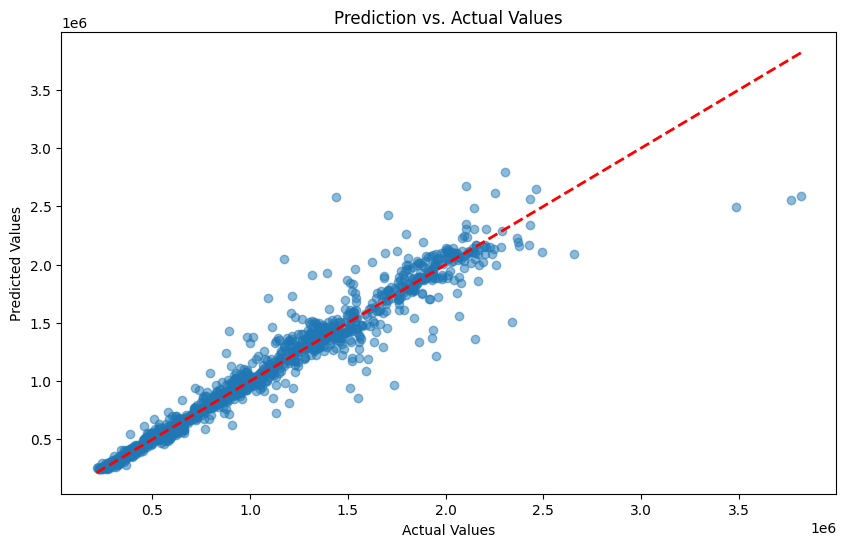

In [25]:
# Plot the model to help me to see how close the predicted value to acual value

plt.figure(figsize=(10, 6))

# Scatter plot for predictions vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual Values')
plt.show()

Each dot represents one prediction. The position of the dot shows how close the prediction (Y-axis) is to the actual value (X-axis).

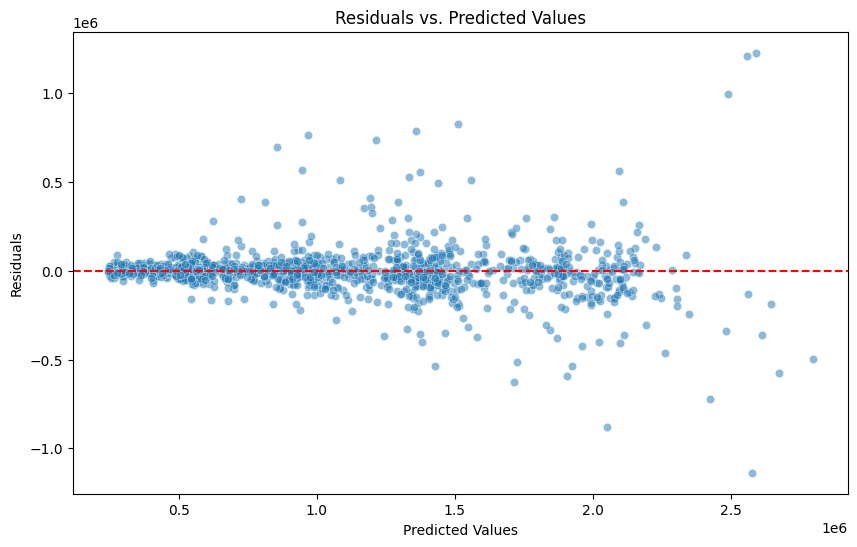

In [26]:
# Plot the model using seaborn library for more validation to help me to see how close the predicted value to acual value


residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

X-axis (Predicted Values): This shows what the model predicted.




Y-axis (Residuals): This shows the difference between the actual values and the predictions.




Red Line (Horizontal Line at 0): This line helps to see if the residuals are spread evenly above and below zero.

